In [1]:
import pandas as pd
import seaborn as sns

#from transformers import pipeline

def find(where, what, op):
    if op == '>=':
        return [i for i, e in enumerate(where) if e >= what]
    elif op == '<=':
        return [i for i, e in enumerate(where) if e <= what]
    elif op == '==':
        return [i for i, e in enumerate(where) if e == what]
    elif op == '>':
        return [i for i, e in enumerate(where) if e > what]
    elif op == '<':
        return [i for i, e in enumerate(where) if e < what]
    else:
        return none
    

## NewYork Times Headlines

In [4]:
df = pd.read_csv('Stock News Dataset.csv', encoding = "ISO-8859-1")

# Removing punctuations
data=df.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
target = df.iloc[:,1]

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

# Convertng headlines to lower case
for index in new_Index:
    data[index]=data[index].str.lower()
data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a hindrance to operations extracts from the...,scorecard,hughes instant hit buoys blues,jack gets his skates on at ice cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar s debut double,southgate strikes leeds pay the penalty,...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl s successor drawn into scandal,the difference between men and women,sara denver nurse turned solicitor,diana s landmine crusade put tories in a panic,yeltsin s resignation caught opposition flat f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader german sleaze inquiry,cheerio boyo,the main recommendations,has cubie killed fees,has cubie killed fees,has cubie killed fees,hopkins furious at foster s lack of hannibal...,has cubie killed fees,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man s extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn t know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united s rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne australia,necaxa mexico,real madrid spain,raja casablanca morocco,corinthians brazil,tony s pet project,al nassr saudi arabia,ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,auntie back in fashion even if the dress look...,shoaib appeal goes to the top,hussain hurt by shambles but lays blame on e...,england s decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for,christmas glitches,upending a table chopping a line and scoring ...,scientific evidence unreliable defence claims,fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake up of failing nhs,lessons of law s hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers are you all whingers,hollywood beyond,ashes and diamonds,whingers a formidable minority,alan parker part two,thuggery toxins and ties,...,most everywhere udis,most wanted chloe lunettes,return of the cane completely off the agenda,from sleepy hollow to greeneland,blunkett outlines vision for over s,embattled dobson attacks play now pay later ...,doom and the dome,what is the north south divide,aitken released from jail,gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,barclays and rbs shares suspended from trading...,pope says church should ask forgiveness from g...,poland shocked by xenophobic abuse of poles ...,there will be no second referendum cabinet ag...,scotland welcome to join eu merkel ally says,sterling dips below friday s year low amid ...,no negative news about south african president...,surge in hate crimes in the u k following u k...,weapons shipped into jordan by the cia and sau...,angela merkel said the u k must file exit pap...,...,german lawyers to probe erdogan over alleged w...,boris johnson says the uk will continue to in...,richard branson is calling on the uk governmen...,turkey sorry for downing russian jet,edward snowden

In [6]:
#concatenar headlines
headlines = []
#hora = datetime.now()
for row in range(0,len(data.index)):
    headlines.append(' '.join(str(x) for x in data.iloc[row]))
#print(datetime.now()-hora)
headlines

['a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues',
 'scorecard the best lake scene leader  german sleaze inquiry',
 'coventry caught on counter by flo united s rivals on the road to rio thatcher issues defence before trial by video',
 'pilgrim knows how to progress thatcher facing ban mcilroy calls for irish fighting spirit',
 'hitches and horlocks beckham off but united survive breast cancer screening',
 'fifth round draw bbc unveils secret weapon in ratings war  south melbourne second division round up',
 'man utd       south melbourne how north atlantic drift could carry away old firm buoyant bbc to show brazil final live',
 'newcastle seek new football supremo liverpool aim to speed up heskey deal highlanders voted up',
 'bungling officials on the carpet and in the red and raw corner it s  killer  mackenzie united put their shirts on    m',
 'pompey plump for pulis work ethic roma under fire over rolexes for referees prenton 

In [13]:
import numpy as np    
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))
X_new = cv.fit_transform(headlines).toarray()
y_new = np.array(target)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3)

print('xtrain', np.shape(X_train))
print('xtest', np.shape(X_test))
print('ytrain', np.shape(y_train))
print('ytest', np.shape(y_test))

xtrain (2870, 101993)
xtest (1231, 101993)
ytrain (2870,)
ytest (1231,)


## Regresión Lineal

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

#categorizo
y_class=[]
for ypred in y_pred:
    if ypred>=0.5:
        y_class.append(1)
    else:
        y_class.append(0)

cr = classification_report(y_test, y_class)
print(cr)

              precision    recall  f1-score   support

           0       0.47      0.44      0.46       585
           1       0.52      0.55      0.54       646

    accuracy                           0.50      1231
   macro avg       0.50      0.50      0.50      1231
weighted avg       0.50      0.50      0.50      1231



## DecisionTree

In [9]:
from sklearn.tree import DecisionTreeClassifier
model_2 = DecisionTreeClassifier()
model_2.fit(X_train, y_train)
y_pred = model_2.predict(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.49      0.46      0.47       585
           1       0.53      0.56      0.55       646

    accuracy                           0.51      1231
   macro avg       0.51      0.51      0.51      1231
weighted avg       0.51      0.51      0.51      1231



## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
model_3 = RandomForestClassifier(n_estimators=200,criterion='entropy')
model_3.fit(X_train, y_train)
y_pred = model_3.predict(X_test)
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.33      0.02      0.04       589
           1       0.52      0.95      0.67       642

    accuracy                           0.51      1231
   macro avg       0.42      0.49      0.36      1231
weighted avg       0.42      0.51      0.37      1231



## LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
ypred = clf.predict(X_test)
cr = classification_report(y_test, ypred)
print(cr)

              precision    recall  f1-score   support

           0       0.46      0.42      0.44       585
           1       0.52      0.56      0.54       646

    accuracy                           0.49      1231
   macro avg       0.49      0.49      0.49      1231
weighted avg       0.49      0.49      0.49      1231



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## PRUEBA CON TRAIN TEST SPLIT -> SALE MAL

In [135]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split


df = pd.read_csv('Stock News Dataset.csv', encoding = "ISO-8859-1")


# Removing special characters
df_headlines=df.iloc[:,2:27]
df_headlines.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
# Renaming column names for better understanding and ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
df_headlines.columns= new_Index
df_headlines.head(5)


# Convertng headlines to lower case
for index in new_Index:
    df_headlines[index] = df_headlines[index].str.lower()
df_headlines.head(1)

headlines = []
for row in range(0,len(df_headlines.index)):
    headlines.append(' '.join(str(x) for x in df_headlines.iloc[row,0:25]))


X_train, X_test, y_train, y_test = train_test_split(headlines, df.iloc[:,1], test_size=0.3)

## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(X_train)
test_dataset = countvector.transform(X_test)



## Random Forest

In [136]:
## implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

## Predict for the Test Dataset
test_dataset = countvector.transform(X_test)
predictions = randomclassifier.predict(test_dataset)

matrix = confusion_matrix(y_test,predictions)
print(matrix)
score = accuracy_score(y_test,predictions)
print(score)
report = classification_report(y_test,predictions)
print(report)

[[ 36 545]
 [ 37 613]]
0.5272136474411048
              precision    recall  f1-score   support

           0       0.49      0.06      0.11       581
           1       0.53      0.94      0.68       650

    accuracy                           0.53      1231
   macro avg       0.51      0.50      0.39      1231
weighted avg       0.51      0.53      0.41      1231



## neural networks

In [64]:
neuralNetworkModels(traindataset, y_train, test_dataset, y_test)

modelo 0: 

[[187 402]
 [212 430]]
0.5012185215272137
              precision    recall  f1-score   support

           0       0.47      0.32      0.38       589
           1       0.52      0.67      0.58       642

    accuracy                           0.50      1231
   macro avg       0.49      0.49      0.48      1231
weighted avg       0.49      0.50      0.49      1231

modelo 1: 

[[128 461]
 [108 534]]
0.537774167343623
              precision    recall  f1-score   support

           0       0.54      0.22      0.31       589
           1       0.54      0.83      0.65       642

    accuracy                           0.54      1231
   macro avg       0.54      0.52      0.48      1231
weighted avg       0.54      0.54      0.49      1231

modelo 2: 

[[292 297]
 [305 337]]
0.5109666937449229
              precision    recall  f1-score   support

           0       0.49      0.50      0.49       589
           1       0.53      0.52      0.53       642

    accuracy         

In [40]:
tn, fp, fn, tp = confusion_matrix(y_test,predictions).ravel()
tp/(tp+fn)


0.8675595238095238

In [1]:
# CODIGO ORIGINAL -> SALE BIEN
import pdb
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

df = pd.read_csv('Stock News Dataset.csv', encoding = "ISO-8859-1")

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [10]:
import numpy as np
print(len(train))
print(len(test))
print(len(df))
print(len(train)+len(test))

3975
378
4101
4353


0.8333333333333333

## CODIGO ORIGINAL -> SALE BIEN (FILTRARON MAL)

In [ ]:
# CODIGO ORIGINAL -> SALE BIEN
import pdb
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

df = pd.read_csv('Stock News Dataset.csv', encoding = "ISO-8859-1")

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
#train = df[df['Date'] < '2015-01-01']
#test = df[df['Date'] > '2014-12-31']
#lista = range()
#sample(lista,k=numero_elementos)

# Removing special characters
df_headlines=train.iloc[:,2:27]
df_headlines.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
# Renaming column names for better understanding and ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
df_headlines.columns= new_Index
df_headlines.head(5)

# Convertng headlines to lower case
for index in new_Index:
    df_headlines[index] = df_headlines[index].str.lower()
df_headlines.head(1)

headlines = []
for row in range(0,len(df_headlines.index)):
    headlines.append(' '.join(str(x) for x in df_headlines.iloc[row,0:25]))

## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))

traindataset=countvector.fit_transform(headlines)

## implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
#pdb.set_trace()
randomclassifier.fit(traindataset,train['Label'])

## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

matrix = confusion_matrix(test['Label'],predictions)
print(matrix)
score = accuracy_score(test['Label'],predictions)
print(score)
report = classification_report(test['Label'],predictions)
print(report)

--Return--
> <ipython-input-38-54920f353247>(37)<module>()->None
-> pdb.set_trace()
(Pdb) headlines


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(Pdb) headlines.head(5
*** SyntaxError: unexpected EOF while parsing
(Pdb) headlines.head(5)
*** AttributeError: 'list' object has no attribute 'head'
(Pdb) print(headlines)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



(Pdb) print(headlines[0:5)
*** SyntaxError: invalid syntax
(Pdb) print(headlines[0:5])
['a  hindrance to operations   extracts from the leaked reports scorecard hughes  instant hit buoys blues jack gets his skates on at ice cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton s party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar s debut double southgate strikes  leeds pay the penalty hammers hand robson a youthful lesson saints party like it s      wear wolves have turned into lambs stump mike catches testy gough s taunt langer escapes to hit     flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl s successor drawn into scandal the difference between men and women sara denver  nurse turned solicitor diana s landmine crusade put tories in a panic yeltsin s resignation caught opposition flat footed russian roulette sold out recovering a title

In [10]:
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top23,Top24,Top25,Combined_News,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Russian roulette,Sold out,Recovering a title,a hindrance to operations extracts from the...,0.469949,0.024411,-0.8271,0.184,0.678,0.138
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite,scorecard the best lake scene leader german s...,0.191667,0.030556,-0.9818,0.257,0.646,0.097
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,Ideal Holmes show,Pinochet leaves hospital after tests,Useful links,coventry caught on counter by flo united s riv...,0.417778,0.348889,0.8225,0.065,0.803,0.133
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart,pilgrim knows how to progress thatcher facing ...,0.289015,0.013907,-0.9217,0.219,0.622,0.159
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,What is the north-south divide?,Aitken released from jail,Gone aloft,hitches and horlocks beckham off but united su...,0.305455,0.178636,-0.9772,0.239,0.666,0.095
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4096,2016-06-27,0,Barclays and RBS shares suspended from trading...,Pope says Church should ask forgiveness from g...,Poland 'shocked' by xenophobic abuse of Poles ...,"There will be no second referendum, cabinet ag...","Scotland welcome to join EU, Merkel ally says",Sterling dips below Friday's 31-year low amid ...,No negative news about South African President...,Surge in Hate Crimes in the U.K. Following U.K...,...,"Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,barclays and rbs shares suspended from trading...,0.352311,-0.014015,-0.9618,0.144,0.760,0.096
4097,2016-06-28,1,"2,500 Scientists To Australia: If You Want To ...","The personal details of 112,000 French police ...",S&amp;P cuts United Kingdom sovereign credit r...,Huge helium deposit found in Africa,CEO of the South African state broadcaster qui...,"Brexit cost investors $2 trillion, the worst o...",Hong Kong democracy activists call for return ...,Brexit: Iceland president says UK can join 'tr...,...,Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...,scientists to australia if you want to ...,0.349330,0.047722,-0.9571,0.133,0.765,0.103
4098,2016-06-29,1,Explosion At Airport In Istanbul,Yemeni former president: Terrorism is the offs...,UK must accept freedom of movement to access E...,Devastated: scientists too late to captive bre...,British Labor Party leader Jeremy Corbyn loses...,A Muslim Shop in the UK Was J

In [6]:
# CODIGO ORIGINAL -> SALE BIEN
import pdb
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

df = pd.read_csv('Stock News Dataset.csv', encoding = "ISO-8859-1")

train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']
#train = df[df['Date'] < '2015-01-01']
#test = df[df['Date'] > '2014-12-31']
#lista = range()
#sample(lista,k=numero_elementos)

# Removing special characters
df_headlines=train.iloc[:,2:27]
df_headlines.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
# Renaming column names for better understanding and ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
df_headlines.columns= new_Index
df_headlines.head(5)

# Convertng headlines to lower case
for index in new_Index:
    df_headlines[index] = df_headlines[index].str.lower()
df_headlines.head(1)

headlines = []
for row in range(0,len(df_headlines.index)):
    headlines.append(' '.join(str(x) for x in df_headlines.iloc[row,0:25]))

## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(headlines)

## implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
#pdb.set_trace()
randomclassifier.fit(traindataset,train['Label'])

## Predict for the Test Dataset
test_transform= []
for row in range(0,len(test.index)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
test_dataset = countvector.transform(test_transform)
predictions = randomclassifier.predict(test_dataset)

matrix = confusion_matrix(test['Label'],predictions)
print(matrix)
score = accuracy_score(test['Label'],predictions)
print(score)
report = classification_report(test['Label'],predictions)
print(report)

[[142  44]
 [ 10 182]]
0.8571428571428571
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       186
           1       0.81      0.95      0.87       192

    accuracy                           0.86       378
   macro avg       0.87      0.86      0.86       378
weighted avg       0.87      0.86      0.86       378



## PRUEBA headlines ny times con sentimentIntensityAnalyzer y textBlob

In [9]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

df = pd.read_csv('Stock News Dataset.csv', encoding = "ISO-8859-1")

df_headlines = df.iloc[:,2:]
df_headlines.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
# Renaming column names for better understanding and ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
df_headlines.columns= new_Index

# Convertng headlines to lower case
for index in new_Index:
    df_headlines[index] = df_headlines[index].str.lower()
df_headlines.head(1)

headlines = []
for row in range(0,len(df_headlines.index)):
    headlines.append(' '.join(str(x) for x in df_headlines.iloc[row,0:25]))

    
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

df['Combined_News'] = headlines
df['Subjectivity'] = df['Combined_News'].apply(getSubjectivity)
df['Polarity'] = df['Combined_News'].apply(getPolarity)

compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(0, len(df['Combined_News'])):
    SIA = getSIA(df['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

#score
df['Compound'] = compound
df['Negative'] = neg
df['Neutral'] = neu
df['Positive'] = pos

keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
X = df[keep_columns]
X = np.array(X.drop(['Label'], 1))
y = np.array(df['Label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearDiscriminantAnalysis().fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

print(classification_report(y_test, predictions))

NameError: name 'train_test_split' is not defined

## PRUEBA dow jones con sentimentIntensityAnalyzer y textBlob

In [143]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

df1 = pd.read_csv('archive/Combined_News_DJIA.csv', encoding = "ISO-8859-1")
df2 = pd.read_csv('archive/upload_DJIA_table.csv', encoding = "ISO-8859-1")
merge = df1.merge(df2, how='inner', on='Date', left_index = True)

df_headlines = df1.iloc[:,2:]
df_headlines.replace('b"'," ",regex=True, inplace=True)
df_headlines.replace("b'"," ",regex=True, inplace=True)
df_headlines.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
# Renaming column names for better understanding and ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
df_headlines.columns= new_Index

# Convertng headlines to lower case
for index in new_Index:
    df_headlines[index] = df_headlines[index].str.lower()
df_headlines.head()

headlines = []
for row in range(0,len(df_headlines.index)):
    headlines.append(' '.join(str(x) for x in df_headlines.iloc[row]))

    
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

merge['Combined_News'] = headlines
merge['Subjectivity'] = merge['Combined_News'].apply(getSubjectivity)
merge['Polarity'] = merge['Combined_News'].apply(getPolarity)

compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(0, len(merge['Combined_News'])):
    SIA = getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

#score
merge['Compound'] = compound
merge['Negative'] = neg
merge['Neutral'] = neu
merge['Positive'] = pos

keep_columns = ['Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
#keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
#keep_columns = ['Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
df = merge[keep_columns]

In [140]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

df1 = pd.read_csv('archive/Combined_News_DJIA.csv', encoding = "ISO-8859-1")
df2 = pd.read_csv('archive/upload_DJIA_table.csv', encoding = "ISO-8859-1")
merge = df1.merge(df2, how='inner', on='Date', left_index = True)

df_headlines = df1.iloc[:,2:]
df_headlines.replace('b"'," ",regex=True, inplace=True)
df_headlines.replace("b'"," ",regex=True, inplace=True)
df_headlines.replace("[^a-zA-Z]"," ",regex=True, inplace=True)
# Renaming column names for better understanding and ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
df_headlines.columns= new_Index

# Convertng headlines to lower case
for index in new_Index:
    df_headlines[index] = df_headlines[index].str.lower()
df_headlines.head()

headlines = []
for row in range(0,len(df_headlines.index)):
    headlines.append(' '.join(str(x) for x in df_headlines.iloc[row]))

    
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

merge['Combined_News'] = headlines
merge['Subjectivity'] = merge['Combined_News'].apply(getSubjectivity)
merge['Polarity'] = merge['Combined_News'].apply(getPolarity)

compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(0, len(merge['Combined_News'])):
    SIA = getSIA(merge['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

#score
merge['Compound'] = compound
merge['Negative'] = neg
merge['Neutral'] = neu
merge['Positive'] = pos

keep_columns = ['Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
#keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
#keep_columns = ['Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
df = merge[keep_columns]
X = df
X = np.array(X.drop(['Label'], 1))
y = np.array(df['Label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearDiscriminantAnalysis().fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.79      0.82       193
           1       0.82      0.88      0.85       205

    accuracy                           0.84       398
   macro avg       0.84      0.84      0.84       398
weighted avg       0.84      0.84      0.84       398



## PRUEBA dow jones con sentimentIntensityAnalyzer y textBlob pero con las labels de mercado, me doy cuenta de que no hay análisis de sentimientos bueno, pierde performance

In [96]:
#keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']

keep_columns = ['Open', 'High', 'Low', 'Volume', 'Label']
df = merge[keep_columns]
X = df
X = np.array(X.drop(['Label'], 1))
y = np.array(df['Label'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearDiscriminantAnalysis().fit(X_train, y_train)

predictions = model.predict(X_test)
predictions

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83       193
           1       0.82      0.89      0.86       205

    accuracy                           0.85       398
   macro avg       0.85      0.85      0.85       398
weighted avg       0.85      0.85      0.85       398



## PRUEBA analisis sentimientos en comentarios de peliculas (solo frase completa)

In [152]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split

df11 = pd.read_csv("sentiment-analysis-on-movie-reviews/train.tsv/train.tsv",sep='\t')
df12 = df11.drop_duplicates(subset=['SentenceId'])

df21 = pd.read_csv("sentiment-analysis-on-movie-reviews/test.tsv/test.tsv",sep='\t')
df22 = df21.drop_duplicates(subset=['SentenceId'])

# Removing special characters
df12.replace("[^a-zA-Z]"," ",regex=True)
df22.replace("[^a-zA-Z]"," ",regex=True)

# Convertng headlines to lower case
df12['Phrase'] = df12['Phrase'].str.lower()
df22['Phrase'] = df12['Phrase'].str.lower()

#converting target to a binary problem
df12['Sentiment'][df12['Sentiment']<3] = 0
df12['Sentiment'][df12['Sentiment']>=3] = 1

X_train, X_test, y_train, y_test = train_test_split(df12['Phrase'], df12['Sentiment'], test_size=0.2)


## implement BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(X_train)
test_dataset = countvector.transform(X_test)

### Random forest

In [153]:
## implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

## Predict for the Test Dataset

predictions = randomclassifier.predict(test_dataset)

matrix = confusion_matrix(y_test,predictions)
print(matrix)
score = accuracy_score(y_test,predictions)
print(score)
report = classification_report(y_test,predictions)
print(report)

[[947  58]
 [564 137]]
0.6354044548651817
              precision    recall  f1-score   support

           0       0.63      0.94      0.75      1005
           1       0.70      0.20      0.31       701

    accuracy                           0.64      1706
   macro avg       0.66      0.57      0.53      1706
weighted avg       0.66      0.64      0.57      1706



In [ ]:
## implement RandomForest Classifier
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindataset,y_train)

## Predict for the Test Dataset

predictions = randomclassifier.predict(test_dataset)

matrix = confusion_matrix(y_test,predictions)
print(matrix)
score = accuracy_score(y_test,predictions)
print(score)
report = classification_report(y_test,predictions)
print(report)

### Logística

In [59]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(traindataset, y_train)


predictions = clf.predict(test_dataset)

## Predict for the Test Dataset

matrix = confusion_matrix(y_test,predictions)
print(matrix)
score = accuracy_score(y_test,predictions)
print(score)
report = classification_report(y_test,predictions)
print(report)

[[822 145]
 [422 317]]
0.6676436107854631
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       967
           1       0.69      0.43      0.53       739

    accuracy                           0.67      1706
   macro avg       0.67      0.64      0.64      1706
weighted avg       0.67      0.67      0.65      1706



In [171]:
sizeClassZero = -sum(np.array(df12.Sentiment)-1)/len(df12.Sentiment)
sizeClassOne = sum(np.array(df12.Sentiment))/len(df12.Sentiment)
print('size class zero: ' + str(sizeClassZero))
print('size class one: ' + str(sizeClassOne))

size class zero: 0.5776761636768671
size class one: 0.42232383632313286


## con redes de neuronas

In [21]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('fivethirtyeight')

# Modelado
# ==============================================================================
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import multiprocessing

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

def neuralNetworkModels(traindataset, y_train, test_dataset, y_test):

    # Modelos
    # ==============================================================================
    modelo_1 = MLPClassifier(
                    hidden_layer_sizes=(5),
                    learning_rate_init=0.01,
                    solver = 'lbfgs',
                    max_iter = 1000,
                    random_state = 123
                )

    modelo_2 = MLPClassifier(
                    hidden_layer_sizes=(10),
                    learning_rate_init=0.01,
                    solver = 'lbfgs',
                    max_iter = 1000,
                    random_state = 123
                )

    modelo_3 = MLPClassifier(
                    hidden_layer_sizes=(20, 20),
                    learning_rate_init=0.01,
                    solver = 'lbfgs',
                    max_iter = 5000,
                    random_state = 123
                )

    modelo_4 = MLPClassifier(
                    hidden_layer_sizes=(50, 50, 50),
                    learning_rate_init=0.01,
                    solver = 'lbfgs',
                    max_iter = 5000,
                    random_state = 123
                )

    modelo_1.fit(X=traindataset, y=y_train)
    modelo_2.fit(X=traindataset, y=y_train)
    modelo_3.fit(X=traindataset, y=y_train)
    modelo_4.fit(X=traindataset, y=y_train)
    
    for i, modelo in enumerate([modelo_1, modelo_2, modelo_3, modelo_4]):
    
        predicciones = modelo.predict(test_dataset)
        matrix = confusion_matrix(y_test,predicciones)
        print('modelo ' + str(i) + ': \n')
        print(matrix)
        score = accuracy_score(y_test,predicciones)
        print(score)
        report = classification_report(y_test,predicciones)
        print(report)

## Películas con analisis de sentimientos intensidad (linear discriminant analysis) todas las clases

In [12]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import pdb

df11 = pd.read_csv("sentiment-analysis-on-movie-reviews/train.tsv/train.tsv",sep='\t')
merge = df11.drop_duplicates(subset=['SentenceId'])

#df21 = pd.read_csv("sentiment-analysis-on-movie-reviews/test.tsv/test.tsv",sep='\t')
#df22 = df21.drop_duplicates(subset=['SentenceId'])

# Removing special characters
merge.replace("[^a-zA-Z]"," ",regex=True)
#df22.replace("[^a-zA-Z]"," ",regex=True)

# Convertng headlines to lower case
merge['Phrase'] = merge['Phrase'].str.lower()
#df22['Phrase'] = df12['Phrase'].str.lower()

#converting target to a binary problem
merge['Sentiment'][merge['Sentiment']<3] = 0
merge['Sentiment'][merge['Sentiment']>=3] = 1

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

merge['Subjectivity'] = merge['Phrase'].apply(getSubjectivity)
merge['Polarity'] = merge['Phrase'].apply(getPolarity)

compound = []
neg = []
pos = []
neu = []
SIA = 0
#pdb.set_trace()
for sentence in merge['Phrase']:
    SIA = getSIA(sentence)
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

#score
merge['Compound'] = compound
merge['Negative'] = neg
merge['Neutral'] = neu
merge['Positive'] = pos


keep_columns = ['Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
#keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']
#keep_columns = ['Open', 'High', 'Low', 'Volume', 'Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Label']


C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Program Files\Anaconda3\lib\site-packages\pandas\core\generic.py:8767: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C

In [18]:
keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Sentiment']
df = merge[keep_columns]
X = np.array(df.drop(['Sentiment'], 1))
y = np.array(df['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## logistico

In [19]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_train, y_train)


predictions = clf.predict(X_test)

## Predict for the Test Dataset

matrix = confusion_matrix(y_test,predictions)
print(matrix)
score = accuracy_score(y_test,predictions)
print(score)
report = classification_report(y_test,predictions)
print(report)


[[1174  320]
 [ 475  590]]
0.6893317702227433
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1494
           1       0.65      0.55      0.60      1065

    accuracy                           0.69      2559
   macro avg       0.68      0.67      0.67      2559
weighted avg       0.69      0.69      0.68      2559



## neural

In [22]:
neuralNetworkModels(X_train, y_train, X_test, y_test)

modelo 0: 

[[1187  307]
 [ 479  586]]
0.6928487690504103
              precision    recall  f1-score   support

           0       0.71      0.79      0.75      1494
           1       0.66      0.55      0.60      1065

    accuracy                           0.69      2559
   macro avg       0.68      0.67      0.67      2559
weighted avg       0.69      0.69      0.69      2559

modelo 1: 

[[1168  326]
 [ 477  588]]
0.6862055490425948
              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1494
           1       0.64      0.55      0.59      1065

    accuracy                           0.69      2559
   macro avg       0.68      0.67      0.67      2559
weighted avg       0.68      0.69      0.68      2559

modelo 2: 

[[1138  356]
 [ 450  615]]
0.6850332161000391
              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1494
           1       0.63      0.58      0.60      1065

    accu

## eliminar clase 2

In [24]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import pdb

df11 = pd.read_csv("sentiment-analysis-on-movie-reviews/train.tsv/train.tsv",sep='\t')
merge = df11.drop_duplicates(subset=['SentenceId'])

#df21 = pd.read_csv("sentiment-analysis-on-movie-reviews/test.tsv/test.tsv",sep='\t')
#df22 = df21.drop_duplicates(subset=['SentenceId'])

# Removing special characters
merge.replace("[^a-zA-Z]"," ",regex=True)
#df22.replace("[^a-zA-Z]"," ",regex=True)

# Convertng headlines to lower case
merge['Phrase'] = merge['Phrase'].str.lower()
#df22['Phrase'] = df12['Phrase'].str.lower()

#converting target to a binary problem
merge['Sentiment'][merge['Sentiment']<2] = 0
merge['Sentiment'][merge['Sentiment']>2] = 1

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

merge['Subjectivity'] = merge['Phrase'].apply(getSubjectivity)
merge['Polarity'] = merge['Phrase'].apply(getPolarity)

compound = []
neg = []
pos = []
neu = []
SIA = 0
#pdb.set_trace()
for sentence in merge['Phrase']:
    SIA = getSIA(sentence)
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

#score
merge['Compound'] = compound
merge['Negative'] = neg
merge['Neutral'] = neu
merge['Positive'] = pos

merge = merge.drop(merge[merge['Sentiment']==2].index)

In [27]:
keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Sentiment']
df = merge[keep_columns]
X = np.array(df.drop(['Sentiment'], 1))
y = np.array(df['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## linear disc analysis

In [28]:
model = LinearDiscriminantAnalysis().fit(X_train, y_train)

predictions = model.predict(X_test)
predictions
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[701 283]
 [327 752]]
              precision    recall  f1-score   support

           0       0.68      0.71      0.70       984
           1       0.73      0.70      0.71      1079

    accuracy                           0.70      2063
   macro avg       0.70      0.70      0.70      2063
weighted avg       0.71      0.70      0.70      2063



## neural

In [30]:
neuralNetworkModels(X_train, y_train, X_test, y_test)

modelo 0: 

[[709 275]
 [351 728]]
0.6965584100824043
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       984
           1       0.73      0.67      0.70      1079

    accuracy                           0.70      2063
   macro avg       0.70      0.70      0.70      2063
weighted avg       0.70      0.70      0.70      2063

modelo 1: 

[[699 285]
 [341 738]]
0.6965584100824043
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       984
           1       0.72      0.68      0.70      1079

    accuracy                           0.70      2063
   macro avg       0.70      0.70      0.70      2063
weighted avg       0.70      0.70      0.70      2063

modelo 2: 

[[712 272]
 [360 719]]
0.6936500242365488
              precision    recall  f1-score   support

           0       0.66      0.72      0.69       984
           1       0.73      0.67      0.69      1079

    accuracy        

## eliminar clases 1, 2 y 3

In [2]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
import pdb

df11 = pd.read_csv("sentiment-analysis-on-movie-reviews/train.tsv/train.tsv",sep='\t')
merge = df11.drop_duplicates(subset=['SentenceId'])

#df21 = pd.read_csv("sentiment-analysis-on-movie-reviews/test.tsv/test.tsv",sep='\t')
#df22 = df21.drop_duplicates(subset=['SentenceId'])

# Removing special characters
merge.replace("[^a-zA-Z]"," ",regex=True)
#df22.replace("[^a-zA-Z]"," ",regex=True)

# Convertng headlines to lower case
merge['Phrase'] = merge['Phrase'].str.lower()
#df22['Phrase'] = df12['Phrase'].str.lower()

#converting target to a binary problem

merge = merge.drop(merge[(merge['Sentiment']>0) & (merge['Sentiment']<4)].index)
#merge['Sentiment'][merge['Sentiment']<1] = 0
merge['Sentiment'][merge['Sentiment']>3] = 1


def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

merge['Subjectivity'] = merge['Phrase'].apply(getSubjectivity)
merge['Polarity'] = merge['Phrase'].apply(getPolarity)

compound = []
neg = []
pos = []
neu = []
SIA = 0
#pdb.set_trace()
for sentence in merge['Phrase']:
    SIA = getSIA(sentence)
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

#score
merge['Compound'] = compound
merge['Negative'] = neg
merge['Neutral'] = neu
merge['Positive'] = pos

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [27]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import RepeatedStratifiedKFold

keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Sentiment']
X = merge[keep_columns]
X = np.array(X.drop(['Sentiment'], 1))
y = np.array(merge['Sentiment'])

model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
# define search
search = GridSearchCV(model, grid, scoring='roc_auc', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('AUC: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
best_model = results.best_estimator_
best_model

AUC: 0.879
Config: {'solver': 'svd'}


'svd'

Next, we can explore whether using shrinkage with the model improves performance.

Shrinkage adds a penalty to the model that acts as a type of regularizer, reducing the complexity of the model.

Regularization reduces the variance associated with the sample based estimate at the expense of potentially increased bias. This bias variance trade-off is generally regulated by one or more (degree-of-belief) parameters that control the strength of the biasing towards the “plausible” set of (population) parameter values.

In [31]:
# define model
model = LinearDiscriminantAnalysis(solver='lsqr')
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['shrinkage'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='f1', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('ROC AUC: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)
best_model = results.best_estimator_
best_model

ROC AUC: 0.815
Config: {'shrinkage': 0.21}


LinearDiscriminantAnalysis(shrinkage=0.21, solver='lsqr')

## remuestreo bootstrap

In [33]:
vSensitivity = []
vEspecificity = []
vAccuracy = []

for i in range(400):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

    model = best_model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    dicc = classification_report(y_test, predictions, output_dict=True)
    vSensitivity.append(dicc['1']['recall'])
    vEspecificity.append(dicc['0']['recall'])
    vAccuracy.append(dicc['accuracy'])

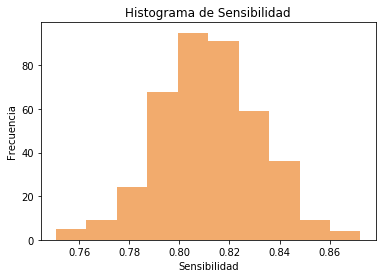

0.8118407020801013


In [25]:
import matplotlib.pyplot as plot

plot.hist(x=np.array(vSensitivity), color='#F2AB6D')
plot.title('Histograma de Sensibilidad')
plot.xlabel('Sensibilidad')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma
print(np.mean(vSensitivity))

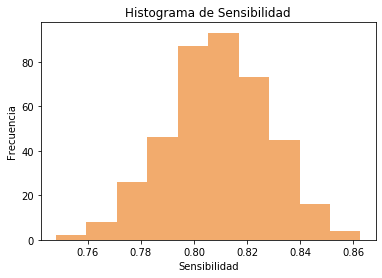

0.8089257230810883


In [34]:
import matplotlib.pyplot as plot

plot.hist(x=np.array(vSensitivity), color='#F2AB6D')
plot.title('Histograma de Sensibilidad')
plot.xlabel('Sensibilidad')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma
print(np.mean(vSensitivity))

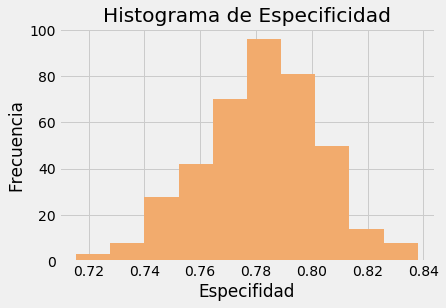

0.7835365853658537


In [311]:
import matplotlib.pyplot as plot

plot.hist(x=np.array(vEspecificity), color='#F2AB6D')
plot.title('Histograma de Especificidad')
plot.xlabel('Especifidad')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma
print(np.median(vEspecificity))

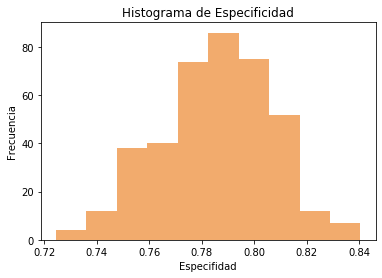

0.7875408496732026


In [35]:
import matplotlib.pyplot as plot

plot.hist(x=np.array(vEspecificity), color='#F2AB6D')
plot.title('Histograma de Especificidad')
plot.xlabel('Especifidad')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma
print(np.median(vEspecificity))

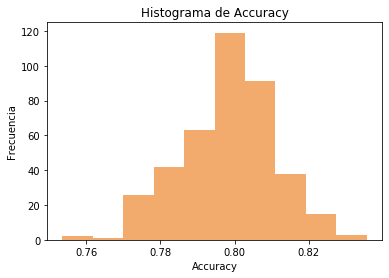

0.7988668555240793


In [36]:
import matplotlib.pyplot as plot

plot.hist(x=np.array(vAccuracy), color='#F2AB6D')
plot.title('Histograma de Accuracy')
plot.xlabel('Accuracy')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma
print(np.median(vAccuracy))

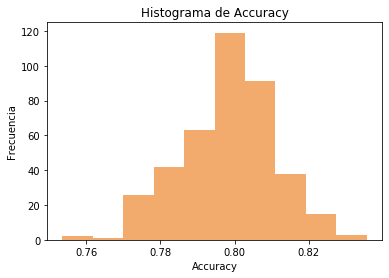

0.7988668555240793


In [37]:
import matplotlib.pyplot as plot

plot.hist(x=np.array(vAccuracy), color='#F2AB6D')
plot.title('Histograma de Accuracy')
plot.xlabel('Accuracy')
plot.ylabel('Frecuencia')

plot.show() #dibujamos el histograma
print(np.median(vAccuracy))

In [308]:
neuralNetworkModels(X_train, y_train, X_test, y_test)

modelo 0: 

[[244  86]
 [ 76 300]]
0.7705382436260623
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       330
           1       0.78      0.80      0.79       376

    accuracy                           0.77       706
   macro avg       0.77      0.77      0.77       706
weighted avg       0.77      0.77      0.77       706

modelo 1: 

[[255  75]
 [ 77 299]]
0.7847025495750708
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       330
           1       0.80      0.80      0.80       376

    accuracy                           0.78       706
   macro avg       0.78      0.78      0.78       706
weighted avg       0.78      0.78      0.78       706

modelo 2: 

[[230 100]
 [ 88 288]]
0.7337110481586402
              precision    recall  f1-score   support

           0       0.72      0.70      0.71       330
           1       0.74      0.77      0.75       376

    accuracy        

## regresion lineal

In [90]:
from textblob import TextBlob
import pandas as pd
import numpy as np
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
import pdb

df11 = pd.read_csv("sentiment-analysis-on-movie-reviews/train.tsv/train.tsv",sep='\t')
merge = df11.drop_duplicates(subset=['SentenceId'])

#df21 = pd.read_csv("sentiment-analysis-on-movie-reviews/test.tsv/test.tsv",sep='\t')
#df22 = df21.drop_duplicates(subset=['SentenceId'])

# Removing special characters
merge.replace("[^a-zA-Z]"," ",regex=True)
#df22.replace("[^a-zA-Z]"," ",regex=True)

# Convertng headlines to lower case
merge['Phrase'] = merge['Phrase'].str.lower()
#df22['Phrase'] = df12['Phrase'].str.lower()

#converting target to a binary problem
#merge['Sentiment'][merge['Sentiment']<3] = 0
#merge['Sentiment'][merge['Sentiment']>=3] = 1

def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
    return TextBlob(text).sentiment.polarity

def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    return sia.polarity_scores(text)

merge['Subjectivity'] = merge['Phrase'].apply(getSubjectivity)
merge['Polarity'] = merge['Phrase'].apply(getPolarity)

compound = []
neg = []
pos = []
neu = []
SIA = 0
#pdb.set_trace()
for sentence in merge['Phrase']:
    SIA = getSIA(sentence)
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

#score
merge['Compound'] = compound
merge['Negative'] = neg
merge['Neutral'] = neu
merge['Positive'] = pos

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Neutral', 'Positive', 'Sentiment']
#keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Sentiment']
#keep_columns = ['Subjectivity', 'Polarity', 'Negative', 'Positive', 'Sentiment']
#keep_columns = ['Polarity', 'Negative', 'Neutral', 'Positive', 'Sentiment']
X = merge[keep_columns]
X = np.array(X.drop(['Sentiment'], 1))
y = np.array(merge['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

## todas las feat

In [114]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
#categorizo
#y_test[y_test<=2]=0
#y_test[y_test>2]=1
y_class=[]
for ypred in y_pred:
    if ypred<=2:
        y_class.append(0)
    else:
        y_class.append(1)

cr = classification_report(y_test, y_class)
print(confusion_matrix(y_test,y_class))
print(cr)
tn, fp, fn, tp = confusion_matrix(y_test,y_class).ravel()
print('tn: ', tn)
print('fp: ', fp)
print('fn: ', fn)
print('tp: ', tp)


[[669 345]
 [187 505]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1014
           1       0.59      0.73      0.65       692

    accuracy                           0.69      1706
   macro avg       0.69      0.69      0.69      1706
weighted avg       0.71      0.69      0.69      1706

tn:  669
fp:  345
fn:  187
tp:  505


## ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Sentiment']

In [115]:
keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Sentiment']
#keep_columns = ['Subjectivity', 'Polarity', 'Negative', 'Positive', 'Sentiment']
#keep_columns = ['Polarity', 'Negative', 'Neutral', 'Positive', 'Sentiment']
X = merge[keep_columns]
X = np.array(X.drop(['Sentiment'], 1))
y = np.array(merge['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
#categorizo
y_test[y_test<=2]=0
y_test[y_test>2]=1
y_class=[]
for ypred in y_pred:
    if ypred<=2:
        y_class.append(0)
    else:
        y_class.append(1)

cr = classification_report(y_test, y_class)
print(confusion_matrix(y_test,y_class))
print(cr)
tn, fp, fn, tp = confusion_matrix(y_test,y_class).ravel()
print('tn: ', tn)
print('fp: ', fp)
print('fn: ', fn)
print('tp: ', tp)

[[669 345]
 [187 505]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1014
           1       0.59      0.73      0.65       692

    accuracy                           0.69      1706
   macro avg       0.69      0.69      0.69      1706
weighted avg       0.71      0.69      0.69      1706

tn:  669
fp:  345
fn:  187
tp:  505


## ['Subjectivity', 'Polarity', 'Negative', 'Positive', 'Sentiment']

In [116]:
#keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Sentiment']
keep_columns = ['Subjectivity', 'Polarity', 'Negative', 'Positive', 'Sentiment']
#keep_columns = ['Polarity', 'Negative', 'Neutral', 'Positive', 'Sentiment']
X = merge[keep_columns]
X = np.array(X.drop(['Sentiment'], 1))
y = np.array(merge['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
#categorizo
y_test[y_test<=2]=0
y_test[y_test>2]=1
y_class=[]
for ypred in y_pred:
    if ypred<=2:
        y_class.append(0)
    else:
        y_class.append(1)

cr = classification_report(y_test, y_class)
print(confusion_matrix(y_test,y_class))
print(cr)
tn, fp, fn, tp = confusion_matrix(y_test,y_class).ravel()
print('tn: ', tn)
print('fp: ', fp)
print('fn: ', fn)
print('tp: ', tp)

[[672 342]
 [192 500]]
              precision    recall  f1-score   support

           0       0.78      0.66      0.72      1014
           1       0.59      0.72      0.65       692

    accuracy                           0.69      1706
   macro avg       0.69      0.69      0.68      1706
weighted avg       0.70      0.69      0.69      1706

tn:  672
fp:  342
fn:  192
tp:  500


In [117]:
## ['Polarity', 'Negative', 'Neutral', 'Positive', 'Sentiment']

In [125]:
#keep_columns = ['Subjectivity', 'Polarity', 'Compound', 'Negative', 'Positive', 'Sentiment']
#keep_columns = ['Subjectivity', 'Polarity', 'Negative', 'Positive', 'Sentiment']
keep_columns = ['Subjectivity', 'Polarity', 'Negative', 'Positive', 'Sentiment']
X = merge[keep_columns]
X = np.array(X.drop(['Sentiment'], 1))
y = np.array(merge['Sentiment'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)
#categorizo
y_test[y_test<=2]=0
y_test[y_test>2]=1
y_class=[]
for ypred in y_pred:
    if ypred<=2:
        y_class.append(0)
    else:
        y_class.append(1)

cr = classification_report(y_test, y_class)
print(confusion_matrix(y_test,y_class))
print(cr)
tn, fp, fn, tp = confusion_matrix(y_test,y_class).ravel()
print('tn: ', tn)
print('fp: ', fp)
print('fn: ', fn)
print('tp: ', tp)

[[633 353]
 [198 522]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       986
           1       0.60      0.72      0.65       720

    accuracy                           0.68      1706
   macro avg       0.68      0.68      0.68      1706
weighted avg       0.69      0.68      0.68      1706

tn:  633
fp:  353
fn:  198
tp:  522
